<a href="https://colab.research.google.com/github/zarrinan/DS-Sprint-02-Storytelling-With-Data/blob/master/module4-sequence-your-narrative/LS_DS_124_Sequence_your_narrative.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_

# Sequence your narrative

Create a sequence of visualizations inspired by [Hans Rosling's 200 Countries, 200 Years, 4 Minutes](https://www.youtube.com/watch?v=jbkSRLYSojo).

Using this [data from Gapminder](https://github.com/open-numbers/ddf--gapminder--systema_globalis/):
- https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv
- https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--life_expectancy_years--by--geo--time.csv
- https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv
- https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv
- https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--concepts.csv

## Upgrade Seaborn

Make sure you have at least version 0.9.0.

In Colab, go to **Restart runtime** after you run the `pip` command.

In [0]:
!pip install --upgrade seaborn

In [183]:
import seaborn as sns
sns.__version__

'0.9.0'

## More imports

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Load & look at data

In [0]:
lifespan = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--life_expectancy_years--by--geo--time.csv')


In [0]:
population = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv')

In [0]:
income = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv')

In [0]:
entities  = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv')

In [0]:
concepts  = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--concepts.csv')

## Merge data

https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf

In [190]:
pd.merge

<function pandas.core.reshape.merge.merge>

In [191]:
income.head()

,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted
0,abw,1800,833
1,abw,1801,833
2,abw,1802,833
3,abw,1803,833
4,abw,1804,833


In [192]:
entities.head()

,country,alt_5,alternative_1,alternative_2,alternative_3,alternative_4_cdiac,arb1,arb2,arb3,arb4,...,latitude,longitude,main_religion_2008,name,pandg,un_state,unicode_region_subtag,upper_case_name,world_4region,world_6region
0,abkh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Abkhazia,NaN,False,NaN,NaN,europe,europe_central_asia
1,abw,NaN,NaN,NaN,NaN,Aruba,NaN,NaN,NaN,NaN,...,12.50000,-69.96667,christian,Aruba,NaN,False,AW,ARUBA,americas,america
2,afg,NaN,Islamic Republic of Afghanistan,NaN,NaN,Afghanistan,NaN,NaN,NaN,NaN,...,33.00000,66.00000,muslim,Afghanistan,AFGHANISTAN,True,AF,AFGHANISTAN,asia,south_asia
3,ago,NaN,NaN,NaN,NaN,Angola,NaN,NaN,NaN,NaN,...,-12.50000,18.50000,christian,Angola,ANGOLA,True,AO,ANGOLA,africa,sub_saharan_africa
4,aia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,18.21667,-63.05000,christian,Anguilla,NaN,False,AI,ANGUILLA,americas,america


In [193]:
population.head()

,geo,time,population_total
0,abw,1800,19286
1,abw,1801,19286
2,abw,1802,19286
3,abw,1803,19286
4,abw,1804,19286


In [194]:
concepts.head()

,concept,color,concept_type,description,description_long,domain,drill_up,indicator_url,name,name_catalog,name_short,scales,source,source_long,source_url,tags
0,adults_with_hiv_percent_age_15_49,NaN,measure,The estimated percentage of adults aged 15 to ...,NaN,NaN,NaN,NaN,"Adults with HIV (%, age 15-49)","Adults with HIV (%, age 15-49)",Adults with HIV,"[""log"", ""linear""]",NaN,NaN,http://www.gapminder.org/gapminder-world/docum...,hiv
1,age_at_1st_marriage_women,NaN,measure,"The mean age, in years, of first marriage for ...",NaN,NaN,NaN,NaN,Age at 1st marriage (women),Age at 1st marriage (women),Age at 1st marriage,"[""linear"", ""log""]",NaN,NaN,http://spreadsheets.google.com/pub?key=t4eF8H_...,population
2,aged_15_24_employment_rate_percent,NaN,measure,"Percentage of total population, age group 15-2...",NaN,NaN,NaN,NaN,Aged 15-24 employment rate (%),Aged 15-24,Employment rate (%),"[""linear"", ""log""]",NaN,NaN,http://ilo.org/legacy/english/global-reports/k...,employment_rate
3,aged_15_24_unemployment_rate_percent,NaN,measure,"Percentage of total population, age group 15-2...",NaN,NaN,NaN,NaN,Aged 15-24 unemployment rate (%),Aged 15-24,Unemployment rate (%),"[""linear"", ""log""]",NaN,NaN,http://ilo.org/legacy/english/global-reports/k...,unemployment
4,aged_15_64_labour_force_participation_rate_per...,NaN,measure,"For age group 15-64, percentage of all labour ...",NaN,NaN,NaN,NaN,Aged 15-64 labour force participation rate (%),Aged 15-64,Labour force participation rate (%),"[""linear"", ""log""]",NaN,NaN,http://ilo.org/legacy/english/global-reports/k...,labour_force_participation


In [195]:
lifespan.head()

,geo,time,life_expectancy_years
0,abw,1800,34.42
1,abw,1801,34.42
2,abw,1802,34.42
3,abw,1803,34.42
4,abw,1804,34.42


In [0]:
df = pd.merge(income, lifespan)

In [197]:
income.shape, lifespan.shape, df.shape

((44268, 3), (44370, 3), (41790, 4))

In [198]:
df.head()

,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years
0,abw,1800,833,34.42
1,abw,1801,833,34.42
2,abw,1802,833,34.42
3,abw,1803,833,34.42
4,abw,1804,833,34.42


## Explore data

In [199]:
entities[entities.country=='abw'].T

,1
country,abw
alt_5,NaN
alternative_1,NaN
alternative_2,NaN
alternative_3,NaN
alternative_4_cdiac,Aruba
arb1,NaN
arb2,NaN
arb3,NaN
arb4,NaN


In [200]:
entities.world_4region.value_counts()

asia        80
europe      73
africa      61
americas    57
Name: world_4region, dtype: int64

In [201]:
entities.world_6region.value_counts()

europe_central_asia         77
sub_saharan_africa          53
america                     53
east_asia_pacific           46
middle_east_north_africa    23
south_asia                   8
Name: world_6region, dtype: int64

In [202]:
variables = ['country', 'name', 'world_6region']
entities[variables].head()

,country,name,world_6region
0,abkh,Abkhazia,europe_central_asia
1,abw,Aruba,america
2,afg,Afghanistan,south_asia
3,ago,Angola,sub_saharan_africa
4,aia,Anguilla,america


In [0]:
df = pd.merge(df, population)

In [204]:
#Preview
pd.merge(df, entities[variables],
        how='inner', left_on='geo', right_on='country').head().T

,0,1,2,3,4
geo,abw,abw,abw,abw,abw
time,1800,1801,1802,1803,1804
income_per_person_gdppercapita_ppp_inflation_adjusted,833,833,833,833,833
life_expectancy_years,34.42,34.42,34.42,34.42,34.42
population_total,19286,19286,19286,19286,19286
country,abw,abw,abw,abw,abw
name,Aruba,Aruba,Aruba,Aruba,Aruba
world_6region,america,america,america,america,america


In [0]:
df = pd.merge(df, entities[variables],
        how='inner', left_on='geo', right_on='country')
df.drop(columns=['geo','country'], inplace=True)
df.rename(columns={
    'time': 'year',
    'income_per_person_gdppercapita_ppp_inflation_adjusted': 'income',
    'life_expectancy_years': 'lifespan',
    'population_total': 'population',
    'name': 'country',
    'world_6region': 'region'
    
}, inplace=True)

In [206]:
df.describe()

,year,income,lifespan,population
count,41790.000000,41790.000000,41790.000000,4.179000e+04
mean,1909.357406,4778.593683,43.267181,1.332550e+07
std,63.322969,10502.602580,16.394240,6.502349e+07
min,1800.000000,247.000000,1.000000,2.128000e+03
25%,1854.000000,884.000000,31.200000,3.760282e+05
50%,1909.000000,1449.000000,35.500000,1.915244e+06
75%,1964.000000,3536.750000,56.340000,6.260147e+06
max,2018.000000,177522.000000,84.170000,1.415046e+09


In [207]:
df.country.unique()

array(['Aruba', 'Afghanistan', 'Angola', 'Albania', 'Andorra',
       'United Arab Emirates', 'Argentina', 'Armenia',
       'Antigua and Barbuda', 'Australia', 'Austria', 'Azerbaijan',
       'Burundi', 'Belgium', 'Benin', 'Burkina Faso', 'Bangladesh',
       'Bulgaria', 'Bahrain', 'Bahamas', 'Bosnia and Herzegovina',
       'Belarus', 'Belize', 'Bermuda', 'Bolivia', 'Brazil', 'Barbados',
       'Brunei', 'Bhutan', 'Botswana', 'Central African Republic',
       'Canada', 'Switzerland', 'Chile', 'China', "Cote d'Ivoire",
       'Cameroon', 'Congo, Dem. Rep.', 'Congo, Rep.', 'Colombia',
       'Comoros', 'Cape Verde', 'Costa Rica', 'Cuba', 'Cyprus',
       'Czech Republic', 'Germany', 'Djibouti', 'Dominica', 'Denmark',
       'Dominican Republic', 'Algeria', 'Ecuador', 'Egypt', 'Eritrea',
       'Spain', 'Estonia', 'Ethiopia', 'Finland', 'Fiji', 'France',
       'Micronesia, Fed. Sts.', 'Gabon', 'United Kingdom', 'Georgia',
       'Ghana', 'Guinea', 'Gambia', 'Guinea-Bissau', 'Equatoria

In [208]:
usa = df[df.country=='United States']
usa[usa.year.isin([1818, 1918, 2018])]

,year,income,lifespan,population,country,region
39399,1818,2258,39.41,9879049,United States,america
39499,1918,9371,47.18,106721812,United States,america
39599,2018,54898,79.14,326766748,United States,america


In [209]:
china = df[df.country=='China']
china[china.year.isin([1818, 1918, 2018])]

,year,income,lifespan,population,country,region
7120,1818,985,32.00,374161494,China,east_asia_pacific
7220,1918,989,22.13,462444535,China,east_asia_pacific
7320,2018,16018,76.92,1415045928,China,east_asia_pacific


## Plot visualization

In [210]:
now = df[df.year==2018]
print(now.shape)



(188, 6)


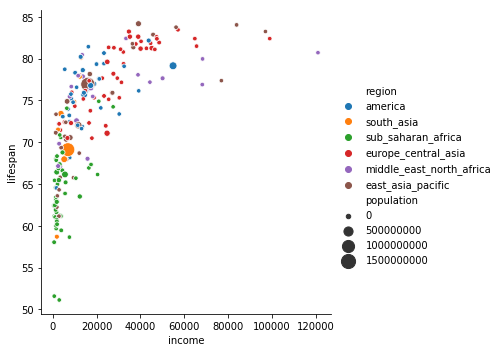

In [211]:
sns.relplot(x='income', y='lifespan', hue='region', size='population', sizes=(20,200), data=now);

In [0]:
now_new = now['income'].apply(lambda x: x > 800000)

In [0]:
now[now.income > 80000]

In [0]:
entities[entities.name=='Macao, China']

In [0]:
qatar = now[now.country=='Qatar']
type(qatar.income.values[0])
qatar_income = qatar.income.values[0]
qatar_lifespan = qatar.lifespan.values[0]

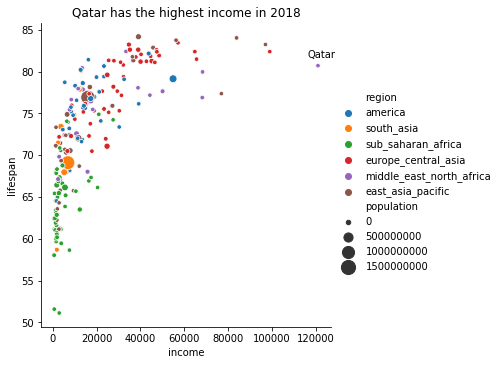

In [216]:
sns.relplot(x='income', y='lifespan', hue='region', size='population', sizes=(20,200), data=now)
plt.text(x=qatar_income-5000, y=qatar_lifespan+1, s='Qatar')
plt.title('Qatar has the highest income in 2018');

In [0]:
years = [1818, 1918, 2018]
centuries = df[df.year.isin(years)]

In [0]:
centuries.head()

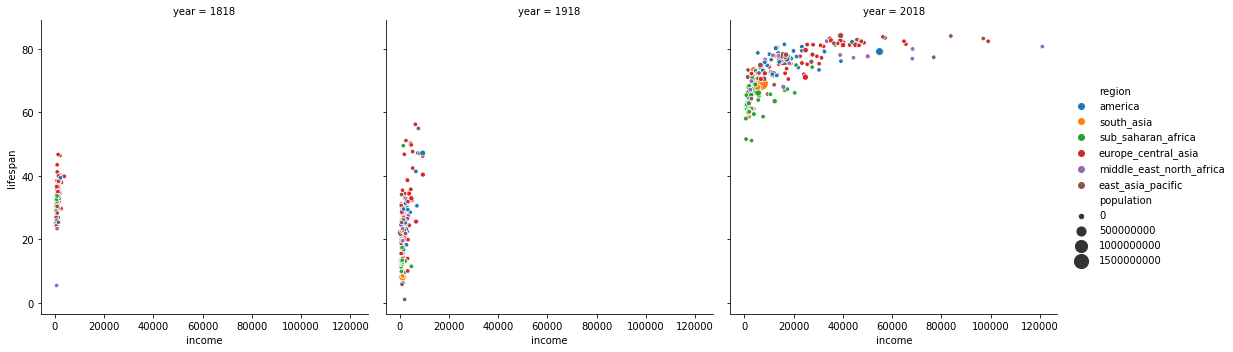

In [268]:
sns.relplot(x='income', y='lifespan', hue='region', size='population', 
            sizes=(20,200), data=centuries, col='year');


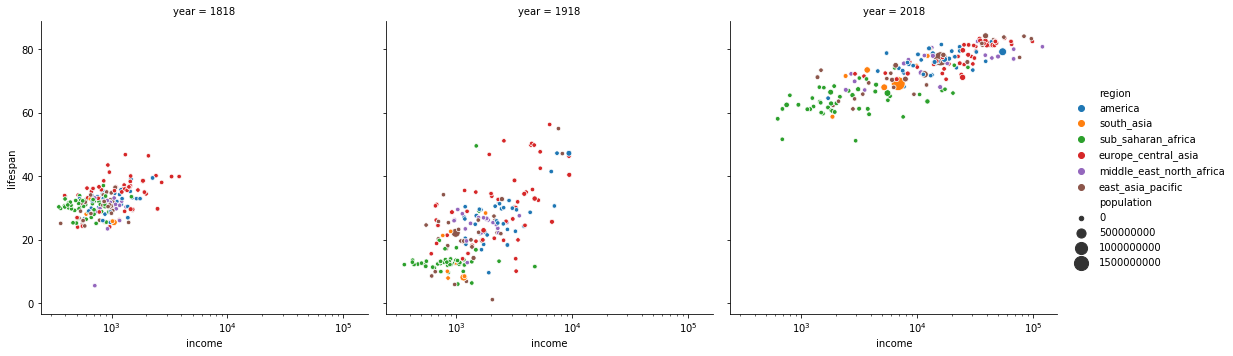

In [269]:
sns.relplot(x='income', y='lifespan', hue='region', size='population', 
            sizes=(20,200), data=centuries, col='year');
plt.xscale('log');

In [221]:
centuries.groupby('year').country.count()

year
1818    190
1918    190
2018    188
Name: country, dtype: int64

In [0]:
years_per_cuntry = centuries.groupby('country').year.count()


In [223]:
years_per_cuntry[years_per_cuntry<3]

country
Greenland    2
Taiwan       2
Name: year, dtype: int64

In [0]:
years = [1918, 1938, 1958, 1978, 1998, 2018]
subset = df[df.year.isin(years)]

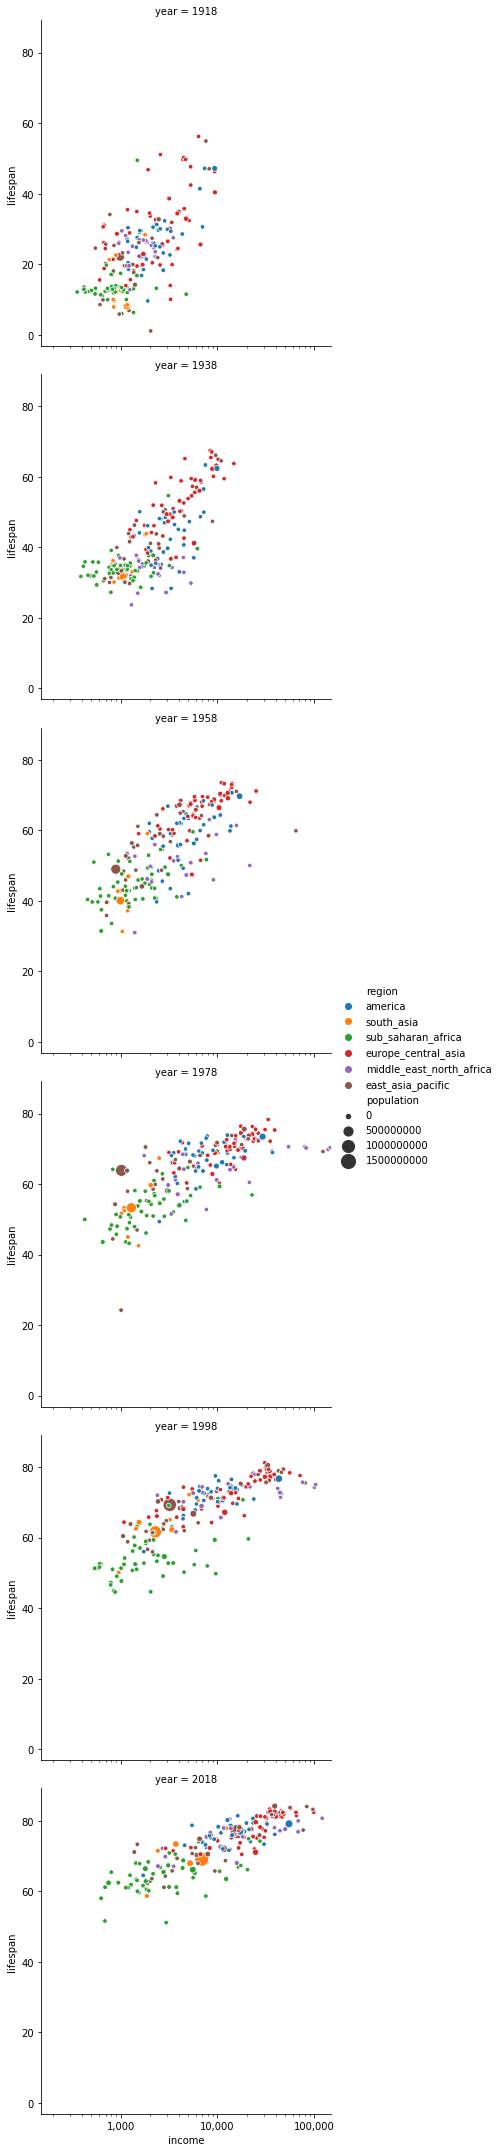

In [271]:
ax = sns.relplot(x='income', y='lifespan', hue='region', size='population', 
            sizes=(20,200), data=subset, row='year');
plt.xscale('log');
plt.xlim((150, 150000));
ax.set_xticklabels(['placeholder1','placeholder2','1,000','10,000','100,000']);

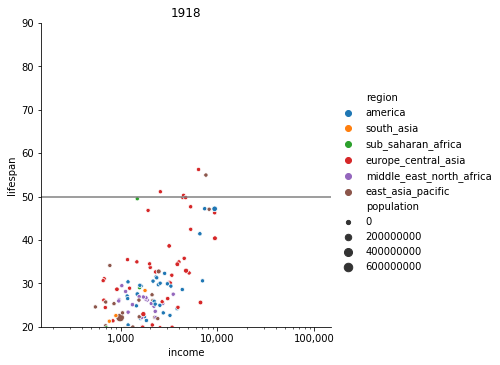

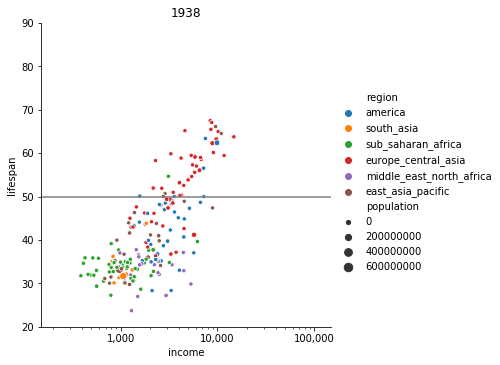

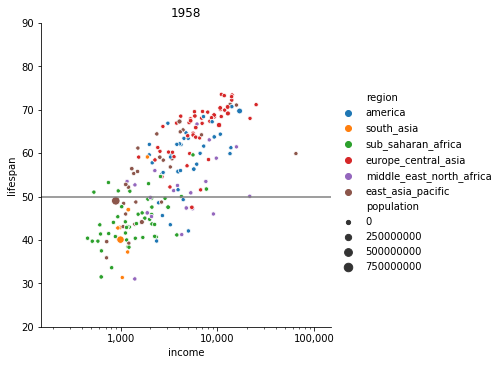

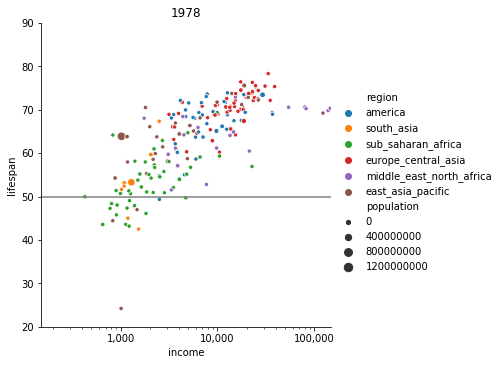

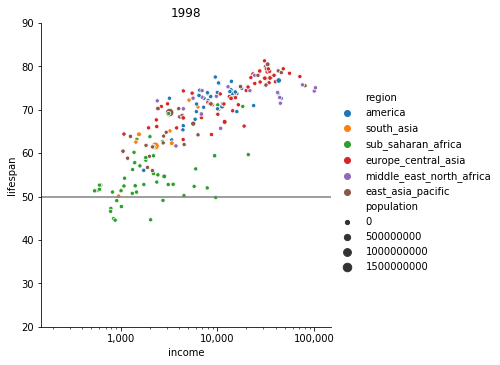

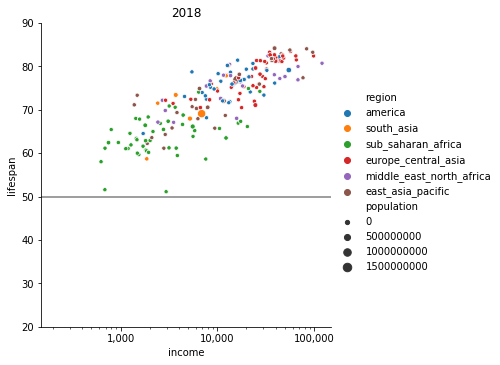

In [282]:
for year in years:

    ax = sns.relplot(x='income', y='lifespan', hue='region', size='population', 
                data=df[df.year==year])

    plt.xscale('log')
    plt.xlim((150, 150000))
    plt.ylim((20, 90))
    plt.title(year)
    plt.axhline(y=50, color='grey');
    ax.set_xticklabels(['placeholder1','placeholder2','1,000','10,000','100,000'])

##100 years ago, few countries had lifespans above 50 years

In [227]:
df[(df.year==1918) & (df.lifespan >= 50)]

,year,income,lifespan,population,country,region
1917,1918,7610,54.95,5066003,Australia,east_asia_pacific
10333,1918,6393,56.24,3165276,Denmark,europe_central_asia
18211,1918,2576,51.11,115504,Iceland,europe_central_asia
28113,1918,4479,50.28,2576646,Norway,europe_central_asia


##Today, no countries have lifespans below 50 years

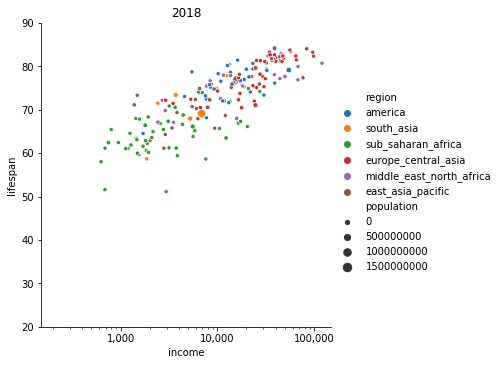

In [285]:
year = 2018 #@param {type:"slider", min:1800, max:2018, step:1}
ax = sns.relplot(x='income', y='lifespan', hue='region', size='population', 
            data=df[df.year==year])

plt.xscale('log')
plt.xlim((150, 150000))
plt.ylim((20, 90))
plt.title(year);
ax.set_xticklabels(['placeholder1','placeholder2','1,000','10,000','100,000']);

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

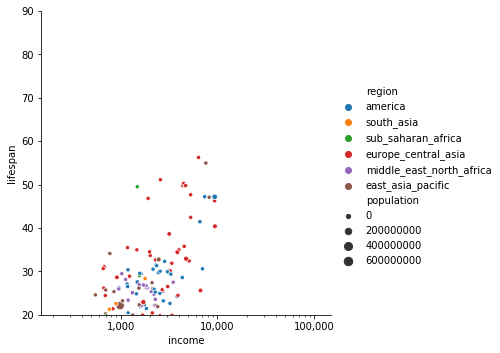

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

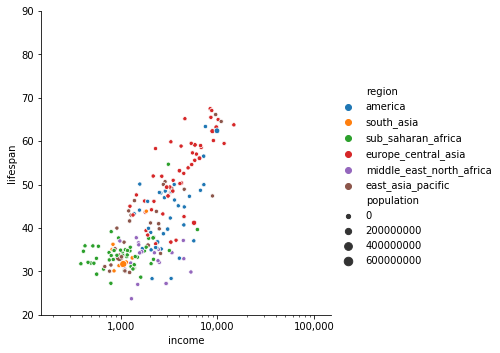

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

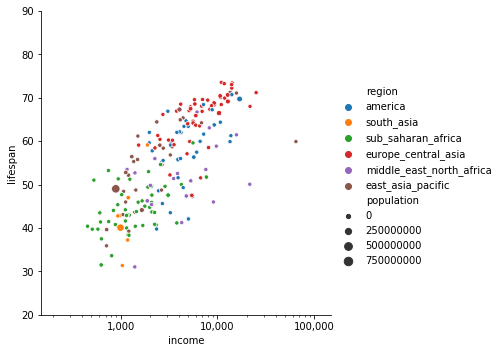

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

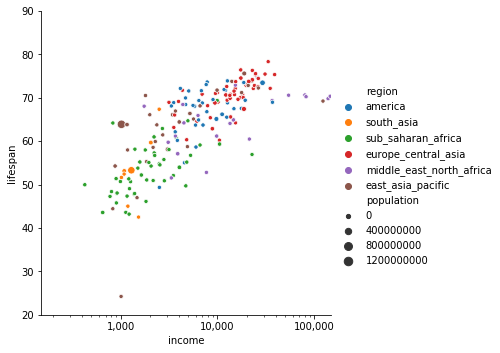

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

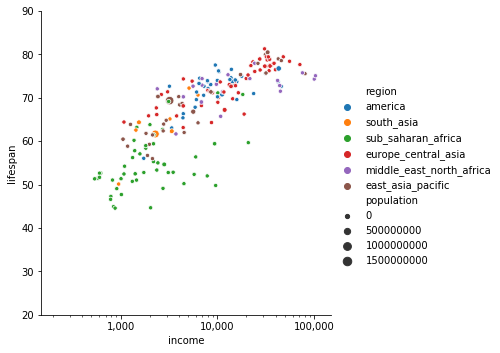

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

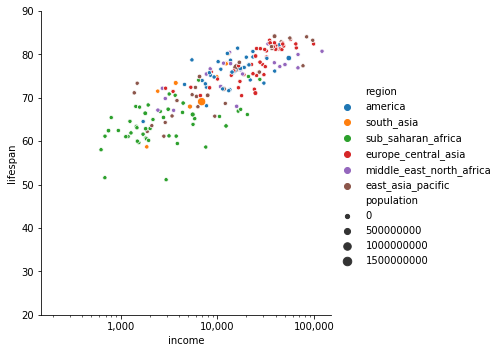

<IPython.core.display.Javascript object>

In [286]:
from google.colab import widgets
tb = widgets.TabBar([str(year) for year in years])
for tab, year in zip(tb, years):
    ax = sns.relplot(x='income', y='lifespan', hue='region', size='population', 
                data=df[df.year==year])

    plt.xscale('log')
    plt.xlim((150, 150000))
    plt.ylim((20, 90));
    ax.set_xticklabels(['placeholder1','placeholder2','1,000','10,000','100,000']);

In [0]:
df_2 = pd.merge(income, lifespan)

In [0]:
df_2 = pd.merge(df_2, population)

In [289]:
df_2.head()

,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years,population_total
0,abw,1800,833,34.42,19286
1,abw,1801,833,34.42,19286
2,abw,1802,833,34.42,19286
3,abw,1803,833,34.42,19286
4,abw,1804,833,34.42,19286


In [0]:
country_entities = entities[entities['is--country']]


In [0]:
country_entities.head(20).T

In [0]:
#country_entities['name'].value_counts()

In [0]:
variables_2 = ['country', 'name', 'landlocked', 'world_6region']
country_entities[variables_2].head()

In [0]:
country_df = country_entities[variables_2]

In [0]:
country_df.head()

In [0]:
df_2.head()

In [0]:
df_merged = pd.merge(df_2, country_df,
        how='inner', left_on='geo', right_on='country')

In [0]:
df_merged.head()

In [0]:
df_merged.drop(columns=['geo','country'], inplace=True)
df_merged.rename(columns={
    'time': 'year',
    'income_per_person_gdppercapita_ppp_inflation_adjusted': 'income',
    'life_expectancy_years': 'lifespan',
    'population_total': 'population',
    'name': 'country',
    'world_6region': 'region'
    
}, inplace=True)

In [0]:
df_merged.head()

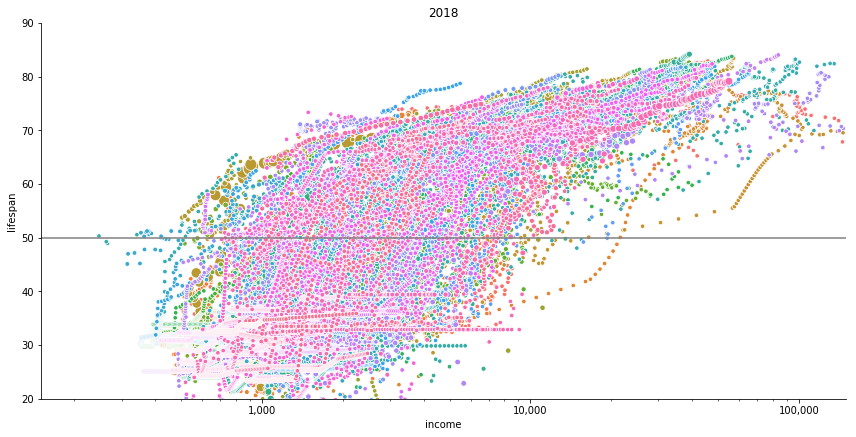

In [244]:
ax = sns.relplot(x='income', y='lifespan', hue='country', size='population', 
          sizes=(20,200), data=df_merged, height=6, aspect=2, legend=False);
plt.xscale('log');
plt.xlim((150, 150000));
plt.ylim((20, 90))
plt.title(year)
plt.axhline(y=50, color='grey');
ax.set_xticklabels(['placeholder1','placeholder2','1,000','10,000','100,000']);

In [245]:
df_merged.head()

,year,income,lifespan,population,country,landlocked,region
0,1800,833,34.42,19286,Aruba,coastline,america
1,1801,833,34.42,19286,Aruba,coastline,america
2,1802,833,34.42,19286,Aruba,coastline,america
3,1803,833,34.42,19286,Aruba,coastline,america
4,1804,833,34.42,19286,Aruba,coastline,america


In [0]:
years = [1818, 1918, 2018]
subset2 = df_merged[df_merged.year.isin(years)]

In [0]:
#Comparing coastal and landlocked countries lifespan change over the years
coastal = subset2[subset2.landlocked == 'coastline']
landlocked = subset2[subset2.landlocked == 'landlocked']

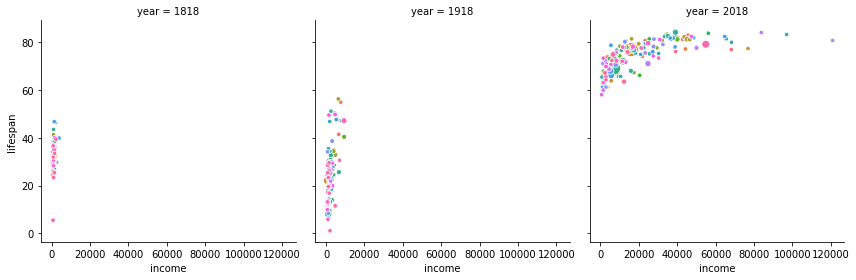

In [248]:
sns.relplot(x='income', y='lifespan', hue='country', size='population', 
            sizes=(20,200), data=coastal, col='year', height=4, aspect=1, legend=False);

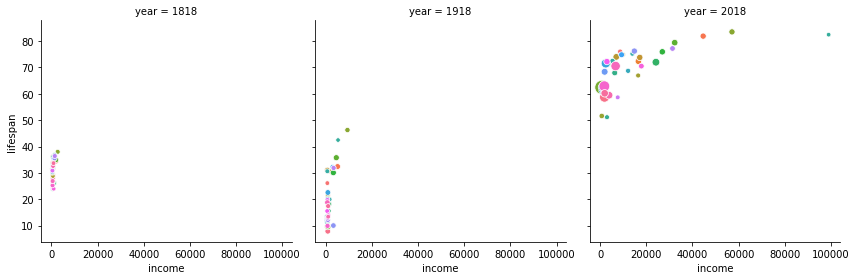

In [249]:
sns.relplot(x='income', y='lifespan', hue='country', size='population', 
            sizes=(20,200), data=landlocked, col='year', height=4, aspect=1, legend=False);


In [0]:
dp = df_merged.copy()

In [0]:
dp = dp.reindex(np.random.permutation(dp.index))

In [361]:
dp.head()

,year,income,lifespan,population,country,landlocked,region
38815,1891,655,25.46,2655370,Uganda,landlocked,sub_saharan_africa
24206,2000,6863,72.13,280384,Maldives,coastline,south_asia
23999,2012,1371,61.36,22346573,Madagascar,coastline,sub_saharan_africa
20170,1906,1029,35.91,2973366,Cambodia,coastline,east_asia_pacific
10504,1870,877,29.90,246693,Dominican Republic,coastline,america


In [0]:
dp = dp.tail(50)

In [358]:
dp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 38815 to 13278
Data columns (total 7 columns):
year          50 non-null int64
income        50 non-null int64
lifespan      50 non-null float64
population    50 non-null int64
country       50 non-null object
landlocked    50 non-null object
region        50 non-null object
dtypes: float64(1), int64(3), object(3)
memory usage: 3.1+ KB


In [0]:
 !pip install plotly --upgrade

In [256]:
import plotly
plotly.__version__

'3.4.1'

In [0]:
import plotly.plotly as py
from plotly.grid_objs import Grid, Column
import plotly.figure_factory as FF
import time

In [359]:
table = FF.create_table(dp.head(10))
py.iplot(table, filename='regions_lifespan')

In [368]:
years_from_col = set(dp['year'])
years_ints = sorted(list(years_from_col))
years = [str(year) for year in years_ints]

# make list of regions
regions = []
for region in dp['region']:
    if region not in regions: 
        regions.append(region)
        
columns = []
# make grid
for year in years:
    for region in regions:
        dp_by_year = dp[dp['year'] == int(year)]
        dp_by_year_and_reg = dp_by_year[dp_by_year['region'] == region]
        for col_name in dp_by_year_and_reg:
            # each column name is unique
            column_name = '{year}_{region}_{header}_lifespan_grid'.format(
                year=year, region=region, header=col_name
            )
            a_column = Column(list(dp_by_year_and_reg[col_name]), column_name)
            columns.append(a_column)
# upload grid
grid = Grid(columns)
url = py.grid_ops.upload(grid, 'lifespan_grid'+str(time.time()), auto_open=False)
url            
#print(columns)

'https://plot.ly/~Zarrina/26/'

In [0]:
print(columns)

In [0]:
figure = {
    'data': [],
    'layout': {},
    'frames': [],
    'config': {'scrollzoom': True}
}

# fill in most of layout
figure['layout']['xaxis'] = {'range': [30, 85], 'title': 'Lifespan', 'gridcolor': '#FFFFFF'}
figure['layout']['yaxis'] = {'title': 'Income', 'type': 'log', 'gridcolor': '#FFFFFF'}
figure['layout']['hovermode'] = 'closest'
figure['layout']['plot_bgcolor'] = 'rgb(223, 232, 243)'

In [0]:
figure['layout']['sliders'] = {
    'active': 0,
    'yanchor': 'top',
    'xanchor': 'left',
    'currentvalue': {
        'font': {'size': 20},
        'prefix': 'text-before-value-on-display',
        'visible': True,
        'xanchor': 'right'
    },
    'transition': {'duration': 300, 'easing': 'cubic-in-out'},
    'pad': {'b': 10, 't': 50},
    'len': 0.9,
    'x': 0.1,
    'y': 0,
    'steps': [...]
}

In [371]:
{
    'method': 'animate',
    'label': 'label-for-frame',
    'value': 'value-for-frame(defaults to label)',
    'args': [{'frame': {'duration': 300, 'redraw': False},
         'mode': 'immediate'}
    ],
}

{'args': [{'frame': {'duration': 300, 'redraw': False}, 'mode': 'immediate'}],
 'label': 'label-for-frame',
 'method': 'animate',
 'value': 'value-for-frame(defaults to label)'}

In [0]:
sliders_dict = {
    'active': 0,
    'yanchor': 'top',
    'xanchor': 'left',
    'currentvalue': {
        'font': {'size': 20},
        'prefix': 'Year:',
        'visible': True,
        'xanchor': 'right'
    },
    'transition': {'duration': 300, 'easing': 'cubic-in-out'},
    'pad': {'b': 10, 't': 50},
    'len': 0.9,
    'x': 0.1,
    'y': 0,
    'steps': []
}

In [0]:
figure['layout']['updatemenus'] = [
    {
        'buttons': [
            {
                'args': [None, {'frame': {'duration': 500, 'redraw': False},
                         'fromcurrent': True, 'transition': {'duration': 300, 'easing': 'quadratic-in-out'}}],
                'label': 'Play',
                'method': 'animate'
            },
            {
                'args': [[None], {'frame': {'duration': 0, 'redraw': False}, 'mode': 'immediate',
                'transition': {'duration': 0}}],
                'label': 'Pause',
                'method': 'animate'
            }
        ],
        'direction': 'left',
        'pad': {'r': 10, 't': 87},
        'showactive': False,
        'type': 'buttons',
        'x': 0.1,
        'xanchor': 'right',
        'y': 0,
        'yanchor': 'top'
    }
]

custom_colors = {
    'america': 'rgb(171, 99, 250)',
    'south_asia': 'rgb(230, 99, 250)',
    'sub_saharan_africa': 'rgb(99, 110, 250)',
    'europe_central_asia': 'rgb(25, 211, 243)',
    'middle_east_north_africa': 'rgb(50, 170, 255)',
    'east_asia_pacific': 'rgb(50, 170, 115)'
}

In [0]:
col_name_template = '{year}_{region}_{header}_lifespan_grid'
year = 2018
for region in regions:
    data_dict = {
        'xsrc': grid.get_column_reference(col_name_template.format(
            year=year, region=region, header='lifespan'
        )),
        'ysrc': grid.get_column_reference(col_name_template.format(
            year=year, region=region, header='income'
        )),
        'mode': 'markers',
        'textsrc': grid.get_column_reference(col_name_template.format(
            year=year, region=region, header='region'
        )),
        'marker': {
            'sizemode': 'area',
            'sizeref': 200000,
            'sizesrc': grid.get_column_reference(col_name_template.format(
                 year=year, region=region, header='population'
            )),
            'color': custom_colors[region]
        },
        'name': region
    }
    figure['data'].append(data_dict)

In [375]:
frame = {'data': [], 'name': value-name}


NameError: ignored

In [0]:
figure['layout']['sliders'] = [sliders_dict]


In [0]:
for year in years:
    frame = {'data': [], 'name': str(year)}
    for region in regions:
        data_dict = {
            'xsrc': grid.get_column_reference(col_name_template.format(
                year=year, region=region, header='lifespan'
            )),
            'ysrc': grid.get_column_reference(col_name_template.format(
                year=year, region=region, header='income'
            )),
            'mode': 'markers',
            'textsrc': grid.get_column_reference(col_name_template.format(
                year=year, region=region, header='region'
                )),
            'marker': {
                'sizemode': 'area',
                'sizeref': 200000,
                'sizesrc': grid.get_column_reference(col_name_template.format(
                    year=year, region=region, header='population'
                )),
                'color': custom_colors[region]
            },
            'name': region
        }
        frame['data'].append(data_dict)

    figure['frames'].append(frame)
    slider_step = {'args': [
        [year],
        {'frame': {'duration': 300, 'redraw': False},
         'mode': 'immediate',
       'transition': {'duration': 300}}
     ],
     'label': year,
     'method': 'animate'}
    sliders_dict['steps'].append(slider_step)

figure['layout']['sliders'] = [sliders_dict]

In [378]:
py.icreate_animations(figure, 'lifespan_example'+str(time.time()))